In [18]:
import json
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

with open("mongo_dump.json") as file:
    graph_topology = json.load(file)['topology']

In [19]:
adjacency_dict: dict[int, list[int]] = dict()
for document in graph_topology:
    adjacency_dict[document['_id']] = document['friends']

In [20]:
all_ids = set()
with_neighbors_ids = set()
for user_friends in graph_topology:
    all_ids.add(user_friends['_id'])
    with_neighbors_ids.add(user_friends['_id'])
    all_ids.update(user_friends['friends'])
all_ids = sorted(all_ids)
with_neighbors_ids = sorted(with_neighbors_ids)

In [21]:
pd.Series({
    "number_of_nodes_in_the_graph": len(all_ids),
    "number_of_parsed_users": len(with_neighbors_ids),
})

number_of_nodes_in_the_graph    15540587
number_of_parsed_users             87983
dtype: int64

# Graph Density

In [22]:
set_with_neighbors_ids = set(with_neighbors_ids)
n_user_friends = []
n_parsed_user_friends = []
for user_id in tqdm(with_neighbors_ids):
    friends = adjacency_dict[user_id]
    parsed_friends = set(friends).intersection(set_with_neighbors_ids)
    n_user_friends.append(len(friends))
    n_parsed_user_friends.append(len(parsed_friends))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87983/87983 [00:02<00:00, 39103.74it/s]


## Number of friends of the parsed user distribution

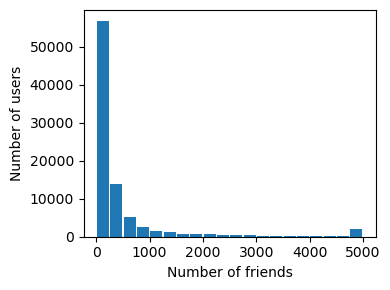

In [78]:
plt.figure(figsize=(5, 4))
plt.hist(n_user_friends, bins=20, rwidth=0.9)
plt.ylabel("Number of users")
plt.xlabel("Number of friends")
# plt.title("Distribution of the number of parsed friends of the user")
plt.tight_layout()
plt.savefig("figures/n_user_friends_distribution.pdf")

## Number of parsed friends for the parsed user distribution

In [64]:
non_zero_parsed_friends = list(filter(lambda x: x!=0, n_parsed_user_friends))
n_zero_parsed_friends = n_parsed_user_friends.count(0)

In [65]:
pd.Series({
    "number_of_users_with_0_parsed_friends": n_zero_parsed_friends,
    "number_of_parsed_with_1_or_more_parsed_friends": len(non_zero_parsed_friends),
})

number_of_users_with_0_parsed_friends             32040
number_of_parsed_with_1_or_more_parsed_friends    55943
dtype: int64

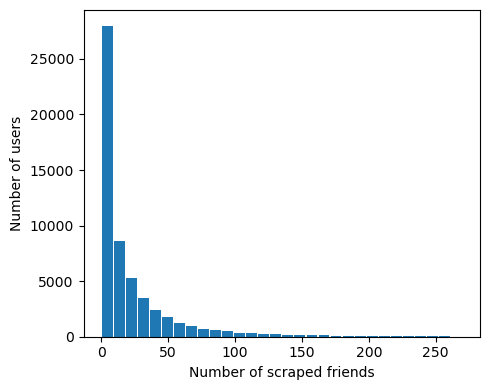

In [77]:
plt.figure(figsize=(5, 4))
plt.hist(non_zero_parsed_friends, bins=30, rwidth=0.9, range=(0, 270))
plt.ylabel("Number of users")
plt.xlabel("Number of scraped friends")
# plt.title("Distribution of the number of parsed friends of the user")
plt.tight_layout()
plt.savefig("figures/n_scraped_user_friends_distribution.pdf")

In [67]:
bins = [0, 1, 2, 3, 4, 6, 11, 21, 101,]
bins.append(999999)
n_parsed_friends_np = np.array(n_parsed_user_friends)
table = {}
for i in range(len(bins) - 1):
    from_bin = bins[i]
    to_bin = bins[i+1] 
    count = ((n_parsed_friends_np >= from_bin) * (n_parsed_friends_np < to_bin)).sum()
    table[f"[{from_bin}, {to_bin - 1}]"] = count
pd.Series(table)

[0, 0]           32040
[1, 1]           10075
[2, 2]            5391
[3, 3]            3466
[4, 5]            4496
[6, 10]           6944
[11, 20]          8206
[21, 100]        15111
[101, 999998]     2254
dtype: int64